In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 7.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 12.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 11.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 14.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")


In [3]:
# Load your dataset
df = pd.read_csv("transactions.csv")
df.head()


,Transaction ID,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,4d3db980-46cd-4158-a812-dcb77055d0d2,2024-06-22 04:06:38,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED
1,099ee548-2fc1-4811-bf92-559c467ca792,2024-06-19 06:04:49,Mohanlal Bakshi,8908837379@okaxis,Mehul Sankaran,7683454560@okaxis,8404.55,SUCCESS
2,d4c05732-6b1b-4bab-90b9-efe09d252b99,2024-06-04 04:56:09,Kismat Bora,4633654150@okybl,Diya Goel,2598130823@okicici,941.88,SUCCESS
3,e8df92ee-8b04-4133-af5a-5f412180c8ab,2024-06-09 09:56:07,Ayesha Korpal,7018842771@okhdfcbank,Rhea Kothari,2246623650@okaxis,8926.00,SUCCESS
4,e7d675d3-04f1-419c-a841-7a04662560b7,2024-06-25 08:38:19,Jivin Batta,1977143985@okybl,Baiju Issac,5245672729@okybl,2800.55,SUCCESS


In [5]:
# Rename column for consistency
df.rename(columns={
    "Transaction ID": "transaction_id",
    "Timestamp": "timestamp",
    "Sender Name": "sender_name",
    "Sender UPI ID": "sender_upi",
    "Receiver Name": "receiver_name",
    "Receiver UPI ID": "receiver_upi",
    "Amount (INR)": "amount",
    "Status": "status"
}, inplace=True)

print(df.info())
print("\nClass Distribution:")
print(df["status"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  1000 non-null   object 
 1   timestamp       1000 non-null   object 
 2   sender_name     1000 non-null   object 
 3   sender_upi      1000 non-null   object 
 4   receiver_name   1000 non-null   object 
 5   receiver_upi    1000 non-null   object 
 6   amount          1000 non-null   float64
 7   status          1000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB
None

Class Distribution:
status
SUCCESS    502
FAILED     498
Name: count, dtype: int64


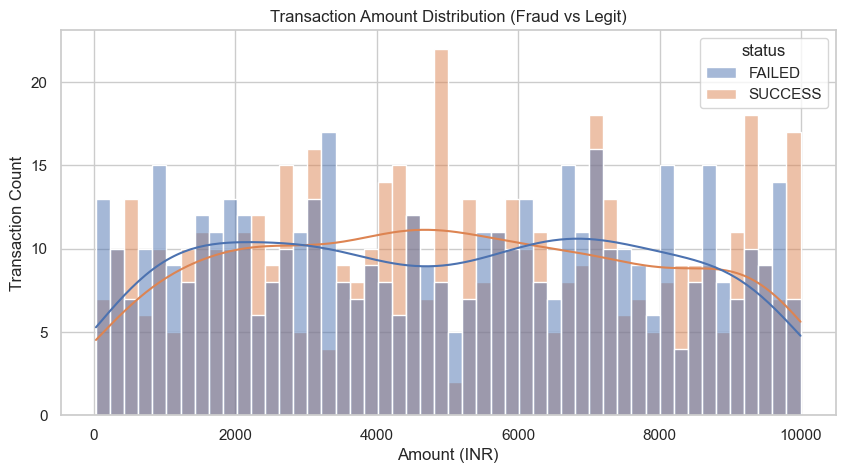

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='amount', hue='status', bins=50, kde=True)
plt.title("Transaction Amount Distribution (Fraud vs Legit)")
plt.xlabel("Amount (INR)")
plt.ylabel("Transaction Count")
plt.show()


In [8]:
print(df_processed['status'].unique())


['FAILED' 'SUCCESS']


In [13]:
from sklearn.preprocessing import LabelEncoder

df_processed = df.copy()

# Encode sender/receiver UPI IDs
le = LabelEncoder()
df_processed['sender_upi'] = le.fit_transform(df_processed['sender_upi'])
df_processed['receiver_upi'] = le.fit_transform(df_processed['receiver_upi'])

# Map 'status' column
df_processed['status'] = df_processed['status'].str.upper().map({
    'SUCCESS': 0,
    'FAILED': 1
}).astype(int)

# ✅ Drop non-numeric / unnecessary columns
df_processed.drop(['transaction_id', 'timestamp', 'sender_name', 'receiver_name'], axis=1, inplace=True)

df_processed.head()


,sender_upi,receiver_upi,amount,status
0,445,787,3907.34,1
1,899,769,8404.55,0
2,490,252,941.88,0
3,709,208,8926.00,0
4,221,527,2800.55,0


In [14]:

X = df_processed.drop("status", axis=1)
y = df_processed["status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [12]:
print(X_train.dtypes)


transaction_id     object
timestamp          object
sender_name        object
sender_upi          int64
receiver_name      object
receiver_upi        int64
amount            float64
dtype: object


Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.52      0.52       151
           1       0.52      0.53      0.52       149

    accuracy                           0.52       300
   macro avg       0.52      0.52      0.52       300
weighted avg       0.52      0.52      0.52       300

Confusion Matrix:


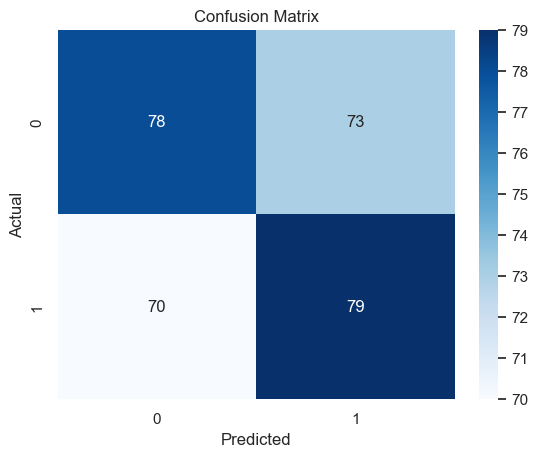

In [15]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


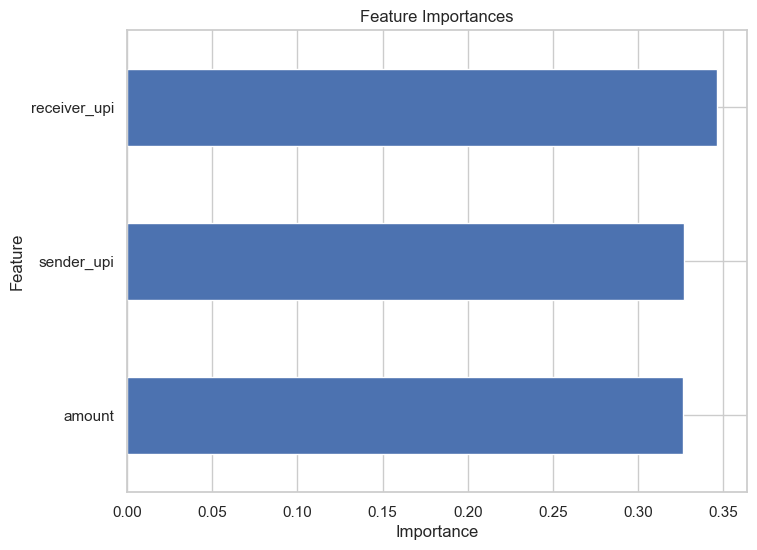

In [16]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()
